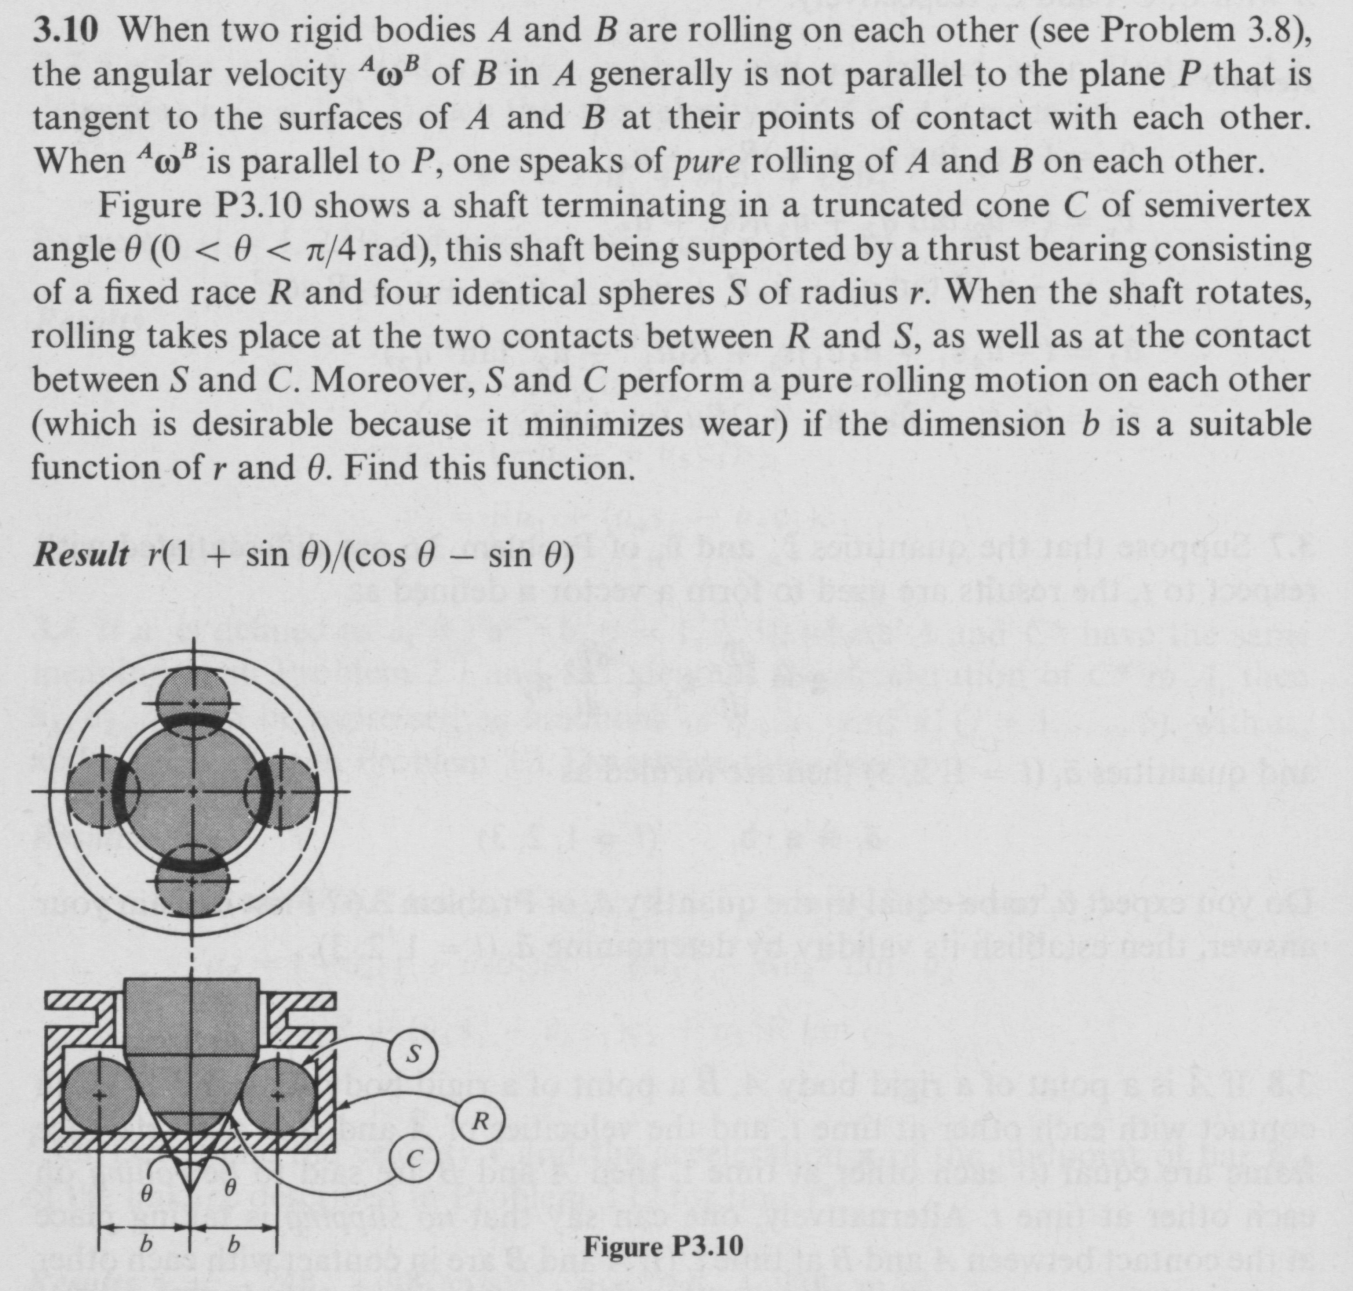

In [1]:
# 2021 / 07 / 07
# Dongil Choi
from IPython.display import Image
Image('figure/kane_fig_3.10.PNG', width=700)

In [2]:
from sympy import cancel, collect, expand_trig, solve, symbols, trigsimp
from sympy import sin, cos
from sympy.physics.mechanics import ReferenceFrame, Point
from sympy.physics.mechanics import dot, dynamicsymbols, msprint

q1, q2, q3, q4, q5, q6, q7 = q = dynamicsymbols('q1:8')
u1, u2, u3, u4, u5, u6, u7 = u = dynamicsymbols('q1:8', level=1)

r, theta, b = symbols('r θ b', real=True, positive=True)

# define reference frames
R = ReferenceFrame('R') # fixed race rf, let R.z point upwards
A = R.orientnew('A', 'axis', [q7, R.z]) # rf that rotates with S* about R.z
# B.x, B.z are parallel with face of cone, B.y is perpendicular
B = A.orientnew('B', 'axis', [-theta, A.x])
S = ReferenceFrame('S')
S.set_ang_vel(A, u1*A.x + u2*A.y + u3*A.z)
C = ReferenceFrame('C')
C.set_ang_vel(A, u4*B.x + u5*B.y + u6*B.z)

# define points
pO = Point('O')
pS_star = pO.locatenew('S*', b*A.y)
pS_hat = pS_star.locatenew('S^', -r*B.y) # S^ touches the cone
pS1 = pS_star.locatenew('S1', -r*A.z) # S1 touches horizontal wall of the race
pS2 = pS_star.locatenew('S2', r*A.y) # S2 touches vertical wall of the race

pO.set_vel(R, 0)
pS_star.v2pt_theory(pO, R, A)
pS1.v2pt_theory(pS_star, R, S)
pS2.v2pt_theory(pS_star, R, S)

# Since S is rolling against R, v_S1_R = 0, v_S2_R = 0.
vc = [dot(p.vel(R), basis) for p in [pS1, pS2] for basis in R]

pO.set_vel(C, 0)
pS_star.v2pt_theory(pO, C, A)
pS_hat.v2pt_theory(pS_star, C, S)

# Since S is rolling against C, v_S^_C = 0.
# Cone has only angular velocity in R.z direction.
vc += [dot(pS_hat.vel(C), basis) for basis in A]
vc += [dot(C.ang_vel_in(R), basis) for basis in [R.x, R.y]]
vc_map = solve(vc, u)

# Pure rolling between S and C, dot(ω_C_S, B.y) = 0.
b_val = solve([dot(C.ang_vel_in(S), B.y).subs(vc_map).simplify()], b)[0][0]
print('b = {0}'.format(msprint(collect(cancel(expand_trig(b_val)), r))))

b = r*(sin(θ) + 1)/(-sin(θ) + cos(θ))
